# Loading the Data

In [23]:
from google.colab import drive
import pandas as pd

# Mount your Google Drive
drive.mount('/content/drive')

# Load the CSV file from Google Drive
df = pd.read_csv('/content/drive/My Drive/IBM_data.csv')

# Display the DataFrame
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2       

In [35]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# 1. Employee Attrition Prediction (Classification)
Objective: Predict whether an employee is likely to leave the company (Attrition) based on various features like Age, BusinessTravel, JobSatisfaction, etc.

Steps:

Preprocess the data by converting categorical features like BusinessTravel, Gender, etc., into numerical form using one-hot encoding.
Train a classification model (e.g., Logistic Regression, Random Forest, or XGBoost) to predict employee attrition.
Evaluate the model using accuracy, precision, recall, and AUC-ROC score.

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

In [8]:
X = df.drop(['Attrition'], axis=1)  # Features
y = df['Attrition'].map({'Yes': 1, 'No': 0})  # Target variable (0 = No, 1 = Yes)

In [9]:
# Convert categorical features into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# Initialize and train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

In [11]:
# Evaluate
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8684807256235828
ROC AUC: 0.5383520276100087
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       380
           1       0.71      0.08      0.15        61

    accuracy                           0.87       441
   macro avg       0.79      0.54      0.54       441
weighted avg       0.85      0.87      0.82       441



# 2. Employee Segmentation Using Clustering
Objective: Perform unsupervised clustering to group employees into different categories based on various attributes such as Age, JobRole, MonthlyIncome, and WorkLifeBalance. This can help in understanding different personas within the organization for targeted HR interventions.

Steps:

Use K-Means or hierarchical clustering to segment employees into groups.


In [25]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [13]:
# Select relevant features for clustering
clustering_data = df[['Age', 'MonthlyIncome', 'YearsAtCompany', 'JobSatisfaction', 'WorkLifeBalance']]


In [14]:
# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

In [15]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(clustering_data_scaled)

In [16]:
# Visualize clusters with PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(clustering_data_scaled)
df['PCA1'] = principal_components[:, 0]
df['PCA2'] = principal_components[:, 1]

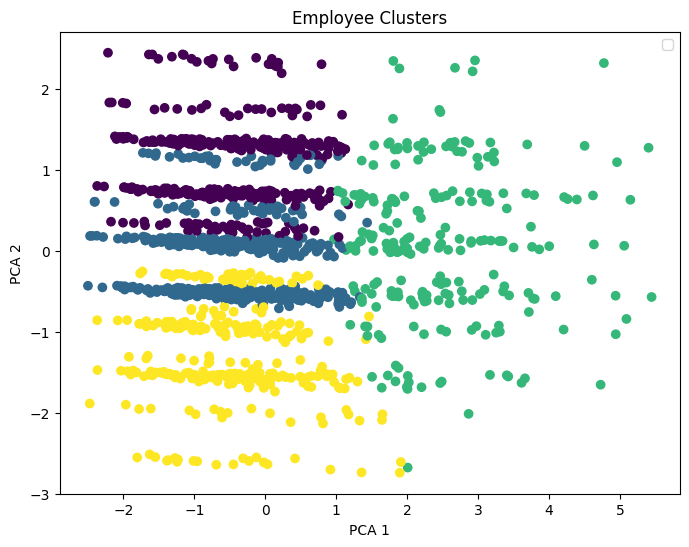

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis')
plt.title("Employee Clusters")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

# 3. Performance and Salary Progression Prediction
Objective: Build a predictive model to forecast an employee's future salary or performance rating based on factors like TotalWorkingYears, JobRole, and YearsSinceLastPromotion.

Steps:

Use regression models (e.g., Linear Regression, Gradient Boosting) to predict future MonthlyIncome or PerformanceRating.


In [31]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [37]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [38]:
# Features for salary prediction
X = df[['Age', 'YearsAtCompany', 'TotalWorkingYears', 'JobLevel', 'PerformanceRating']]
y = df['MonthlyIncome']

In [39]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
# Train linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred = lr_model.predict(X_test)

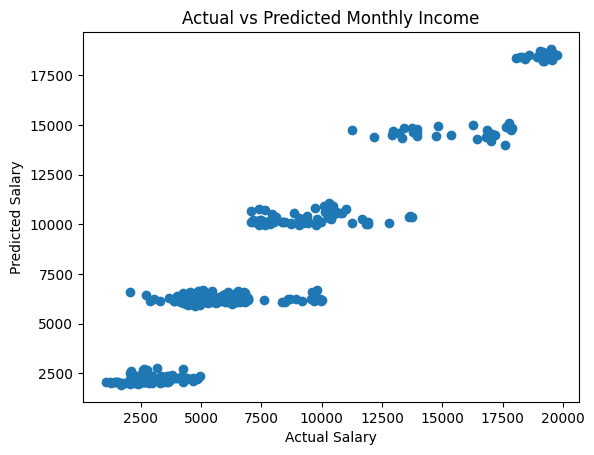

In [41]:
# Plot actual vs predicted salaries
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Monthly Income")
plt.show()

# 4. Employee Attrition Analysis Dashboard
User Story:

As an HR Analyst, I want to create an interactive dashboard that visualizes employee attrition rates by various demographics (age, gender, department, etc.) so that I can identify patterns and trends related to employee turnover.

In [43]:
import seaborn as sns

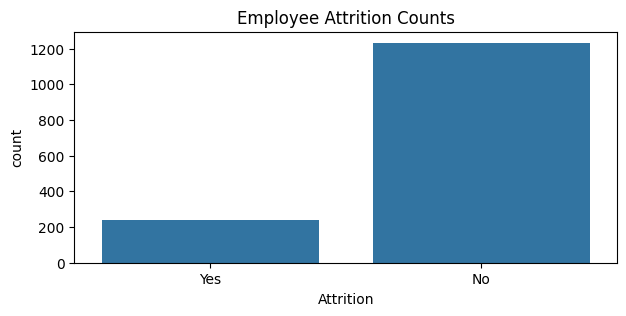

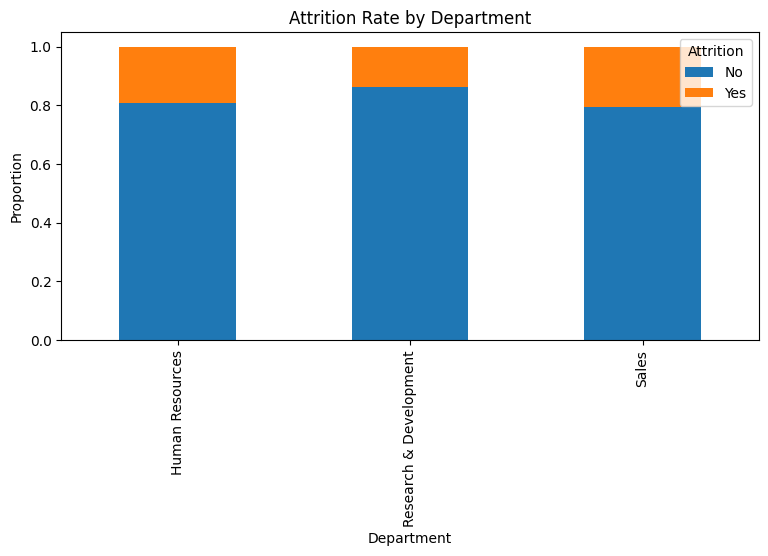

In [46]:
def attrition_analysis(df):
    plt.figure(figsize=(7, 3))
    sns.countplot(x='Attrition', data=df)
    plt.title('Employee Attrition Counts')
    plt.show()

    attrition_rate_by_dept = df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack()
    attrition_rate_by_dept.plot(kind='bar', stacked=True, figsize=(9, 4))
    plt.title('Attrition Rate by Department')
    plt.ylabel('Proportion')
    #plt.xlabel(rotation=45)
    plt.show()

attrition_analysis(df)

# 5. Employee Demographics Report
User Story:

As an Organizational Development Specialist, I want to generate a report detailing the demographics of employees who have left the company compared to those who remain so that we can understand the composition of our workforce better.
Features:

Analyze and summarize data based on attributes such as Age, Gender, EducationField, and JobRole.
Use visualizations like pie charts to represent demographic distributions.
Highlight disparities or significant differences in demographics between the attrition and retention groups.

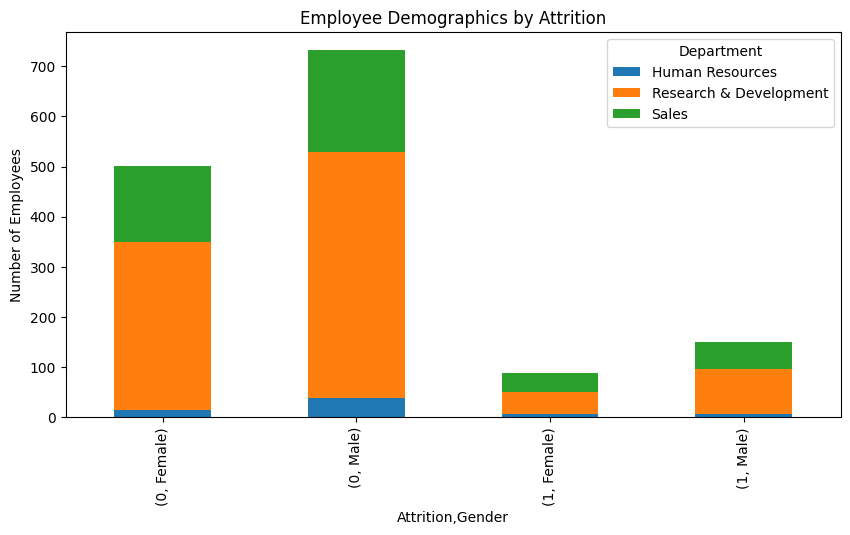

In [49]:
def demographics_report(df):
    demographics = df[['Age', 'Gender', 'Department', 'Attrition']].groupby(['Attrition', 'Gender', 'Department']).size().unstack(fill_value=0)
    demographics.plot(kind='bar', stacked=True, figsize=(10, 5))
    plt.title('Employee Demographics by Attrition')
    plt.ylabel('Number of Employees')
    plt.show()

demographics_report(df)

# 6. Retention Strategy Development
User Story:

As a Senior Manager, I want to develop strategies to improve employee retention based on insights gathered from the dataset, so that we can reduce attrition rates and retain top talent.
Features:

Identify key factors contributing to attrition (e.g., low JobSatisfaction, high DistanceFromHome).
Conduct focus groups or surveys to gather qualitative feedback from current employees.
Recommend specific retention strategies, such as mentorship programs, flexible working conditions, and enhanced benefits packages.

In [50]:
def retention_strategies(df):
    high_attrition = df[df['Attrition'] == 1]
    common_factors = high_attrition[['JobSatisfaction', 'DistanceFromHome', 'OverTime']].describe()
    print("Common Factors in High Attrition:\n", common_factors)

retention_strategies(df)

Common Factors in High Attrition:
        JobSatisfaction  DistanceFromHome
count       237.000000        237.000000
mean          2.468354         10.632911
std           1.118058          8.452525
min           1.000000          1.000000
25%           1.000000          3.000000
50%           3.000000          9.000000
75%           3.000000         17.000000
max           4.000000         29.000000
